In [1]:
# import all the needed module

from pandas import DataFrame, read_csv

import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import seaborn as sb
from scipy.io import loadmat 
import pandas as pd
plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
xx=loadmat('./wk_60_new.mat')

In [3]:
df=xx['wk_60']
df2=xx['wk_60']

In [4]:
X=df[:,:8]
y=df2[:,-1]

In [5]:
import collections
frequency = collections.Counter(y)
print(dict(frequency))

{2.0: 2341, 1.0: 3459}


In [6]:
from scipy import stats
stats.describe(X)

DescribeResult(nobs=5800, minmax=(array([ -4.365025,  -2.761926,  -0.479381,  -0.480317, 223.347762,
       214.258395,  -0.946248,  -0.756998]), array([  3.982252,   2.9934  , 144.845453, 138.963401, 264.224059,
       254.587946,  55.308178,  55.308178])), mean=array([-3.87106036e-02, -1.64765402e-02,  4.54305433e+01,  4.37790899e+01,
        2.52416648e+02,  2.43146508e+02,  2.53804762e+01,  2.50408631e+01]), variance=array([3.08525426e-01, 1.89500658e-01, 1.99882658e+03, 1.71070970e+03,
       1.46389584e+02, 1.42495239e+02, 4.22934333e+02, 4.30118524e+02]), skewness=array([-0.01953457, -0.00362137,  0.8213939 ,  0.83141111, -0.85336484,
       -0.88003076,  0.24276585,  0.25681889]), kurtosis=array([ 5.38556769,  4.08478802, -0.54861432, -0.38769935, -0.47382632,
       -0.43712424, -1.41638493, -1.41975283]))

In [7]:
#Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
print('Number of samples in training set: %d, number of samples in test set: %d'%(len(y_train), len(y_test)))

Number of samples in training set: 4060, number of samples in test set: 1740


In [9]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40), activation='logistic', max_iter = 4000)

# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(40, 40, 40),
              max_iter=4000)

              precision    recall  f1-score   support

         1.0       0.75      0.74      0.75      1038
         2.0       0.62      0.63      0.63       702

    accuracy                           0.70      1740
   macro avg       0.69      0.69      0.69      1740
weighted avg       0.70      0.70      0.70      1740



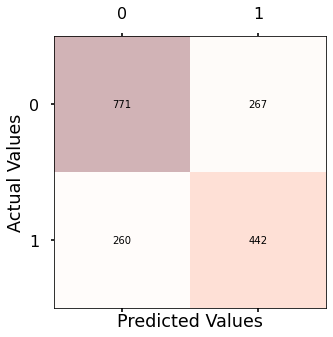

In [10]:
# predict results from the test data
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)
print(classification_report(y_test, predicted))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

In [ ]:
# evaluate a model with a given number of repeats
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40), activation='logistic', max_iter = 4000)

def evaluate_model_acc(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(mlp, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
def evaluate_model_apr(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(mlp, X, y, scoring='average_precision', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_f1(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(mlp, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_recall(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(mlp, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores

# configurations to test
repeats = range(1,11)
results_acc = list()
results_apr = list()
results_f1 = list()
results_recall = list()

for r in repeats:
    # evaluate using a given number of repeats
    scores_acc = evaluate_model_acc(X, y, r)
    scores_apr = evaluate_model_apr(X, y, r)
    scores_f1 = evaluate_model_f1(X, y, r)
    scores_recall = evaluate_model_recall(X, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_acc), sem(scores_acc), std(scores_acc)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_apr), sem(scores_apr), std(scores_apr)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_f1), sem(scores_f1), std(scores_f1)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_recall), sem(scores_recall),std(scores_recall)))
    # store
    results_acc.append(scores_acc)
    results_apr.append(scores_apr)
    results_f1.append(scores_f1)
    results_recall.append(scores_recall)
# plot the results
pyplot.boxplot(results_acc, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [ ]:
#A combination of under- and oversampling method using pipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

over = SMOTE(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('u', under), ('o', over), ('model', mlp)]
pipeline = Pipeline(steps=steps)


# import libraries for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean

# evaluate pipeline
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)


def evaluate_model_acc(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_apr(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring='average_precision', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_f1(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_recall(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    # model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores

# configurations to test
repeats = range(1,11)
pipe_res_acc = list()
pipe_res_apr = list()
pipe_res_f1 = list()
pipe_res_recall = list()

for r in repeats:
    # evaluate using a given number of repeats
    scores_acc = evaluate_model_acc(X, y, r)
    scores_apr = evaluate_model_apr(X, y, r)
    scores_f1 = evaluate_model_f1(X, y, r)
    scores_recall = evaluate_model_recall(X, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_acc), sem(scores_acc), std(scores_acc)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_apr), sem(scores_apr), std(scores_apr)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_f1), sem(scores_f1), std(scores_f1)))
    print('>%d mean=%.4f se=%.3f std=%.3f' % (r, mean(scores_recall), sem(scores_recall),std(scores_recall)))
    # store
    pipe_res_acc.append(scores_acc)
    pipe_res_apr.append(scores_apr)
    pipe_res_f1.append(scores_f1)
    pipe_res_recall.append(scores_recall)
# plot the results
pyplot.boxplot(pipe_res_acc, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()